In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from word2number import w2n
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

from sklearn.feature_selection import SelectKBest          ## Feature Engineering
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier


## Univariate selection
(Select features that have strongest relationship with the output variable)

Output Feature to predict = "price range" (which price range it belongs)

In [2]:
data = pd.read_excel(r'D:\PYTHON Practice Projecs\TRAIN_4.xlsx')

In [3]:
data.head(2)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2


In [4]:
## Define independent & target features and put them in x and y
x = data.iloc[:,0:20]           ## independent feature
y = data.iloc[:,-1]             ## dependent feature (Target feature)


## SelectKBest

In [5]:
## Applying SelectKBest (to extract top 10 Correlated/best features)

best_features = SelectKBest(score_func=chi2, k =10)
fit = best_features.fit(x,y)

df_scores = pd.DataFrame(fit.scores_)                            ## making df for scores
df_columns = pd.DataFrame(x.columns)                             ## making df for columns

# Concat df for visualisation
features_score = pd.concat([df_columns, df_scores], axis =1)     ## concat both df's
features_score.columns = ['Features', 'Score']                   ## Naming columns


## Higher the score more important/correlated the feature is

In [6]:
features_score.sort_values(by='Score', ascending= False).head(12)

,Features,Score
13,ram,931267.519053
11,px_height,17363.569536
0,battery_power,14129.866576
12,px_width,9810.586750
8,mobile_wt,95.972863
6,int_memory,89.839124
15,sc_w,16.480319
16,talk_time,13.236400
4,fc,10.135166
14,sc_h,9.614878


## Feature importance ****

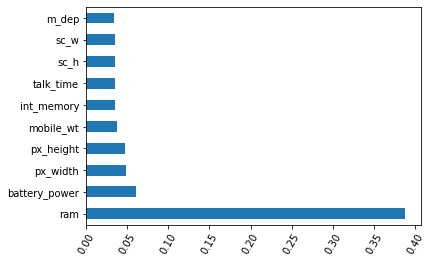

In [7]:
Classify = ExtraTreesClassifier()
Classify.fit(x,y)

## Ploting important features for visualisation
feature_importance = pd.Series(Classify.feature_importances_, index= x.columns)
feature_importance.nlargest(10,).plot(kind = 'barh')
plt.xticks(rotation = 60)
plt.show()


In [8]:
print(Classify.feature_importances_)

[0.06043908 0.01905532 0.03394959 0.01861737 0.03300222 0.01831591
 0.03553566 0.03400846 0.03715707 0.03400221 0.03343171 0.04788064
 0.04843631 0.3877198  0.03504209 0.0346712  0.03530808 0.01487419
 0.01775908 0.02079403]


## Colerration Matrix With HeatMap

<AxesSubplot:>

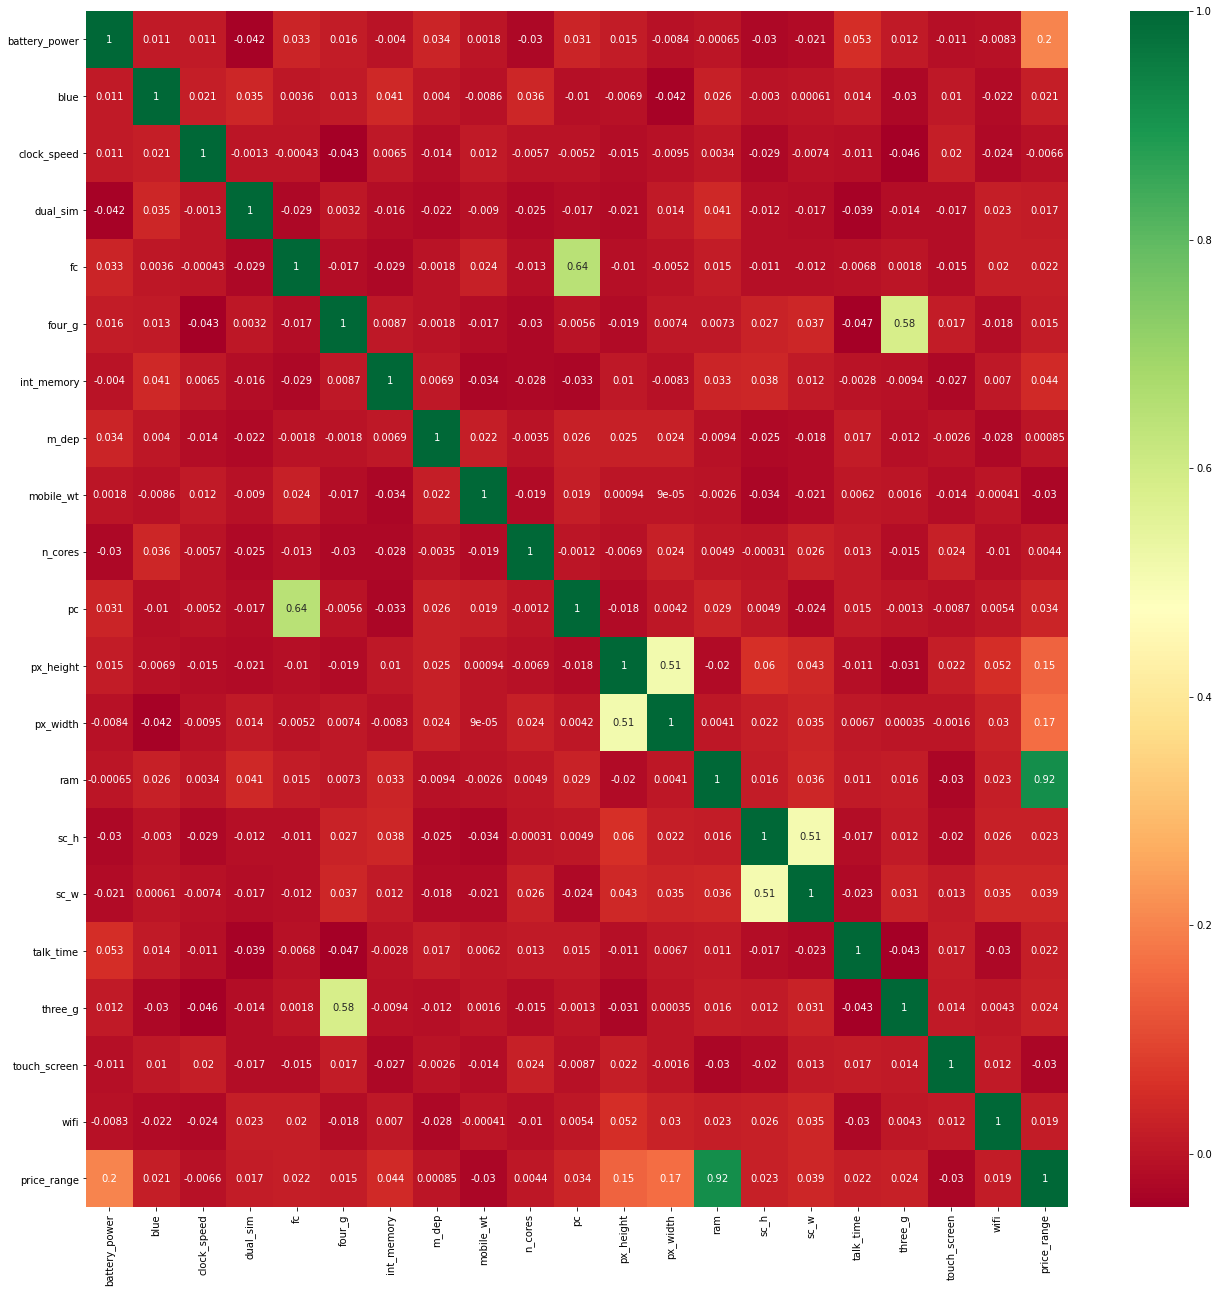

In [9]:
corr_mat = data.corr()

top_corr_features = corr_mat.index

plt.figure(figsize=(22,22))

sns.heatmap(data[top_corr_features].corr(),annot=True, cmap = 'RdYlGn' )
